In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re

In [2]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer
import string 
from nltk.corpus import stopwords 
stopwords = stopwords.words("english")

In [3]:
train_data = pd.read_csv('train_2kmZucJ.csv')
test_data = pd.read_csv('test_oJQbWVk.csv')

In [4]:
train_data.shape, test_data.shape

((7920, 3), (1953, 2))

In [5]:
combine_data = train_data.append(test_data, sort = False, ignore_index=True)
combine_data.shape

(9873, 3)

In [6]:
#Missing_Values Treatment
df1 = combine_data.isnull().sum().to_frame().rename(columns = {0 : 'Train Missing Values'})
df2 = combine_data.dtypes.to_frame().rename(columns = {0: 'DTypes'})
df = pd.concat([df1, df2], axis =1)
df

,Train Missing Values,DTypes
id,0,int64
label,1953,float64
tweet,0,object


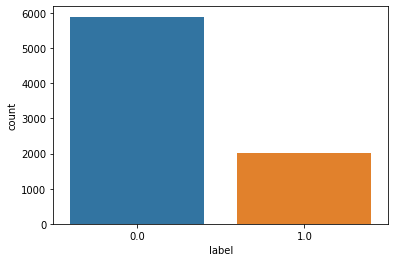

In [7]:
combine_data['label'].value_counts(normalize = True)
sns.countplot(combine_data['label'])

In [8]:
def clean(txt):
    txt = re.sub(r'http\S+', '', txt) # remove URLs
    txt = re.sub(r'[%$#@&)(^?]', '', txt) # remove special characters
    txt= re.sub(r'[.,:;]', '', txt)
    txt = txt.lower()
    txt = "".join(x for x in txt if x not in string.punctuation)
    words = txt.split()
    words = [w for w in words if w not in stopwords]
    txt = " ".join(words)
    return txt

In [9]:
## Keyword Analysis 
from collections import Counter
complete_text = " ".join(combine_data["tweet"])
clean_text = clean(complete_text)
Counter(clean_text.split()).most_common(100)

[('iphone', 4520),
 ('apple', 3555),
 ('samsung', 1728),
 ('new', 1426),
 ('phone', 1178),
 ('sony', 1012),
 ('…', 887),
 ('follow', 872),
 ('ipad', 624),
 ('love', 536),
 ('like', 528),
 ('life', 509),
 ('android', 484),
 ('rt', 465),
 ('instagram', 436),
 ('day', 431),
 ('cute', 398),
 ('photo', 390),
 ('gain', 387),
 ('today', 386),
 ('get', 385),
 ('im', 373),
 ('back', 359),
 ('galaxy', 351),
 ('got', 348),
 ('music', 344),
 ('photography', 344),
 ('fun', 340),
 ('case', 332),
 ('news', 327),
 ('ios', 314),
 ('app', 307),
 ('happy', 302),
 ('time', 282),
 ('instagood', 275),
 ('one', 275),
 ('lol', 268),
 ('funny', 267),
 ('beautiful', 265),
 ('fashion', 255),
 ('work', 254),
 ('smile', 253),
 ('tech', 249),
 ('iphonex', 246),
 ('itunes', 246),
 ('birthday', 246),
 ('ipod', 243),
 ('make', 233),
 ('cant', 231),
 ('photooftheday', 229),
 ('amazing', 227),
 ('finally', 224),
 ('good', 223),
 ('everyone', 222),
 ('girl', 217),
 ('apps', 216),
 ('must', 211),
 ('dont', 207),
 ('update

In [10]:
combine_data['clean_tweet'] = combine_data['tweet'].apply(lambda x: clean(x))

In [11]:
combine_data.head()

,id,label,tweet,clean_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love would go talk makememories unplug relax i...
3,4,0.0,I'm wired I know I'm George I was made that wa...,im wired know im george made way iphone cute d...
4,5,1.0,What amazing service! Apple won't even talk to...,amazing service apple wont even talk question ...


In [12]:
def tokenize_words_Sents(Sent):
    return word_tokenize(Sent),sent_tokenize(Sent)
 
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

In [13]:
Words,Sents = tokenize_words_Sents(combine_data.tweet[1])
print("Words ",Words)
print("Sents ",Sents)

Words  ['Finally', 'a', 'transparant', 'silicon', 'case', '^^', 'Thanks', 'to', 'my', 'uncle', ':', ')', '#', 'yay', '#', 'Sony', '#', 'Xperia', '#', 'S', '#', 'sonyexperias…', 'http', ':', '//instagram.com/p/YGEt5JC6JM/']
Sents  ['Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/']


In [14]:
print(RegExpTokenizer(train_data.tweet[1]))

['Finally', 'a', 'transparant', 'silicon', 'case', 'Thanks', 'to', 'my', 'uncle', 'yay', 'Sony', 'Xperia', 'S', 'sonyexperias', 'http', 'instagram', 'com', 'p', 'YGEt5JC6JM']


In [15]:
import string

combine_data['Word Count'] = [len(text.split()) for text in combine_data['tweet']]

combine_data['Uppercase Char Count'] = [sum(char.isupper() for char in review) \
                              for review in combine_data['tweet']]                           

combine_data['Special Char Count'] = [sum(char in string.punctuation for char in review) \
                            for review in combine_data['tweet']] 

In [16]:
combine_data.head()

,id,label,tweet,clean_tweet,Word Count,Uppercase Char Count,Special Char Count
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...,13,5,16
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...,17,12,16
2,3,0.0,We love this! Would you go? #talk #makememorie...,love would go talk makememories unplug relax i...,15,6,18
3,4,0.0,I'm wired I know I'm George I was made that wa...,im wired know im george made way iphone cute d...,17,7,17
4,5,1.0,What amazing service! Apple won't even talk to...,amazing service apple wont even talk question ...,23,4,5


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
bow = vectorizer.fit_transform(combine_data['clean_tweet'])
labels = combine_data['label']

In [19]:
len(vectorizer.get_feature_names())

21366

In [20]:
vectorizer = TfidfVectorizer(min_df=15)
bow = vectorizer.fit_transform(combine_data['clean_tweet'])
len(vectorizer.get_feature_names())

1052

In [21]:
vectorizer = TfidfVectorizer(min_df=15)
bow = vectorizer.fit_transform(combine_data['clean_tweet'])
bow

<9873x1052 sparse matrix of type '<class 'numpy.float64'>'
	with 70888 stored elements in Compressed Sparse Row format>

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [24]:
train_bow = bow[:7920,:]
test_bow = bow[7920:,:]

# splitting data into training and validation set
X_train, X_test, y_train, y_test = train_test_split(train_bow, train_data['label'], random_state=42, test_size=0.3)

In [25]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [26]:
classifier = rfc()
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)

0.8585858585858586

In [30]:
prediction = classifier.predict(X_test)

In [31]:
f1_score(y_test, prediction)

0.7062937062937064

In [32]:
from xgboost import XGBClassifier

In [33]:
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train,y_train)
xgbmodel.score(X_test,y_test)
prediction = xgbmodel.predict(X_test)

In [34]:
f1_score(y_test, prediction)

0.7329931972789114

In [39]:
test_pred = xgbmodel.predict(test_bow)
test_data['label'] = test_pred
submission = test_data[['id','label']]
submission.to_csv('sub_xgb_bow.csv', index=False)